<a href="https://colab.research.google.com/github/Mahen-Mahindaratne/TensorFlow/blob/main/Image%20Classifier/image_classifier_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# 1. Download and Extract the FreeCodeCamp Dataset
print("Starting dataset download and extraction...")

# Use the reliable freeCodeCamp mirror link
_URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'

# Download the file to the current directory using shell command
!wget -q $_URL -O cats_and_dogs.zip

# Unzip the downloaded file. This creates a directory named 'cats_and_dogs'
!unzip -q cats_and_dogs.zip -d .

# 2. Define the Directory Paths
# The unzipped structure is now in the current working directory, not /tmp
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
# The original dataset also includes a 'test' folder, let's define it too.
test_dir = os.path.join(PATH, 'test')

# *** Confirmation Check ***
if os.path.isdir(train_dir):
    print("\n✅ Dataset extracted successfully!")
else:
    print("\n❌ ERROR: Dataset extraction failed. Check the output above.")
    raise FileNotFoundError(f"Directory not found: {train_dir}")

# Get number of files in each directory.
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir)) # Test directory contains 50 images directly

# Print data summary for portfolio
print("\n--- Dataset Summary ---")
print(f'Train directory path: {train_dir}')
print(f'Validation directory path: {validation_dir}')
print(f'Test directory path: {test_dir}')
print(f'Total training images: {total_train}')
print(f'Total validation images: {total_val}')
print(f'Total test images: {total_test}')
print("-----------------------")

Starting dataset download and extraction...

✅ Dataset extracted successfully!

--- Dataset Summary ---
Train directory path: cats_and_dogs/train
Validation directory path: cats_and_dogs/validation
Test directory path: cats_and_dogs/test
Total training images: 2001
Total validation images: 1001
Total test images: 51
-----------------------


In [ ]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

print("Configuration variables defined.")

Configuration variables defined.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


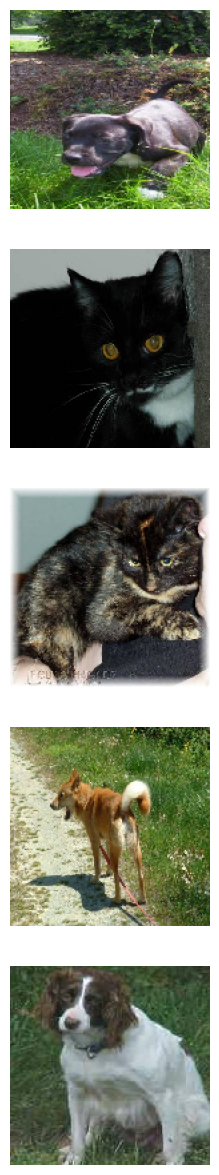

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt

# 3. Initialize Data Generators
# Rescaling is done here. No augmentation yet.
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Flow from directory using the defined paths and variables
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# 4. Plotting Function (No change)
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

# Preview a batch of training images
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])